In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 라이브러리 로드 및 초기설정

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# 하나의 cell에서 print문을 사용하지 않고 multiple output 출력을 가능하게 하는 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# DataFrame의 사이즈가 큰 경우, 어떻게 화면에 출력을 할지 setting하는 코드
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('max_columns', None)

In [4]:
# 시스템 운영체제에 맞는 폰트를 불러와 적용하기
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

font_family = get_font_family()

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [5]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 상권정보 데이터 불러오기

In [74]:
path_dir = '/content/gdrive/MyDrive/aiffel-hackathon/data'
file_list = os.listdir(path_dir)

In [75]:
file_list

['상가업소정보_201912_01.csv',
 '상가업소정보_201912_02.csv',
 '상가업소정보_201912_03.csv',
 '상가업소정보_201912_04.csv',
 '20211022_sample_hackathon_data.csv']

In [76]:
df = pd.read_csv(path_dir + '/상가업소정보_201912_03.csv', sep='|')
df.shape
df.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(869907, 39)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19943193,프리즐,NaN,Q,음식,Q04,분식,Q04A01,라면김밥분식,I56194,분식 및 김밥 전문점,41,경기도,41360,남양주시,4136025300,진접읍,4136025321,진접읍,4136025321206720001,1,대지,672,1.000,경기도 남양주시 진접읍 장현리 672-1,413603197028,경기도 남양주시 진접읍 봉현로,14,nan,4136025321106720001024396,NaN,경기도 남양주시 진접읍 봉현로 14,472865.000,12013.000,NaN,3.000,NaN,127.181,37.715
1,19943449,최씨네별난맛집,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,41,경기도,41250,동두천시,4125056500,불현동,4125010400,광암동,4125010400204940034,1,대지,494,34.000,경기도 동두천시 광암동 494-34,412504367026,경기도 동두천시 광암로33번길,15,nan,4125010400104940034000001,NaN,경기도 동두천시 광암로33번길 15,483040.000,11321.000,NaN,1.000,NaN,127.086,37.896


In [77]:
df['시도명'].unique()

array(['경기도', '충청북도', '강원도'], dtype=object)

## 경기

In [78]:
df_gyeonggi = df[df['시도명'] == '경기도']
df_gyeonggi.shape
df_gyeonggi.head(2)

(650152, 39)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19943193,프리즐,NaN,Q,음식,Q04,분식,Q04A01,라면김밥분식,I56194,분식 및 김밥 전문점,41,경기도,41360,남양주시,4136025300,진접읍,4136025321,진접읍,4136025321206720001,1,대지,672,1.000,경기도 남양주시 진접읍 장현리 672-1,413603197028,경기도 남양주시 진접읍 봉현로,14,nan,4136025321106720001024396,NaN,경기도 남양주시 진접읍 봉현로 14,472865.000,12013.000,NaN,3.000,NaN,127.181,37.715
1,19943449,최씨네별난맛집,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,41,경기도,41250,동두천시,4125056500,불현동,4125010400,광암동,4125010400204940034,1,대지,494,34.000,경기도 동두천시 광암동 494-34,412504367026,경기도 동두천시 광암로33번길,15,nan,4125010400104940034000001,NaN,경기도 동두천시 광암로33번길 15,483040.000,11321.000,NaN,1.000,NaN,127.086,37.896


In [79]:
# 결측치 확인
df_gyeonggi.isnull().sum()

상가업소번호            0
상호명               1
지점명          568379
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      42577
표준산업분류명       42577
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지        173710
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        531007
건물관리번호            0
건물명          338653
도로명주소             0
구우편번호           285
신우편번호            12
동정보          586217
층정보          321016
호정보          491816
경도                0
위도                0
dtype: int64

In [80]:
# 불필요한 컬럼 리스트
not_use_cols = ['지점명', '표준산업분류명', '지번부번지', '건물부번지', '건물명', '동정보', '층정보', '호정보', 
                '상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '표준산업분류코드', 
                '시도코드', '시군구코드', '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', 
                '건물관리번호', '구우편번호', '신우편번호', '행정동명', '대지구분명', '지번본번지', '건물본번지', '도로명']
not_use_cols

['지점명',
 '표준산업분류명',
 '지번부번지',
 '건물부번지',
 '건물명',
 '동정보',
 '층정보',
 '호정보',
 '상가업소번호',
 '상권업종대분류코드',
 '상권업종중분류코드',
 '상권업종소분류코드',
 '표준산업분류코드',
 '시도코드',
 '시군구코드',
 '행정동코드',
 '법정동코드',
 '지번코드',
 '대지구분코드',
 '도로명코드',
 '건물관리번호',
 '구우편번호',
 '신우편번호',
 '행정동명',
 '대지구분명',
 '지번본번지',
 '건물본번지',
 '도로명']

In [81]:
# 불필요한 컬럼 삭제
print('기존 컬럼수', df_gyeonggi.shape)
df_gyeonggi = df_gyeonggi.drop(not_use_cols, axis=1)
print('변경 컬럼수', df_gyeonggi.shape)

기존 컬럼수 (650152, 39)
변경 컬럼수 (650152, 11)


In [82]:
df_gyeonggi.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,법정동명,지번주소,도로명주소,경도,위도
0,프리즐,음식,분식,라면김밥분식,경기도,남양주시,진접읍,경기도 남양주시 진접읍 장현리 672-1,경기도 남양주시 진접읍 봉현로 14,127.181,37.715
1,최씨네별난맛집,음식,한식,한식/백반/한정식,경기도,동두천시,광암동,경기도 동두천시 광암동 494-34,경기도 동두천시 광암로33번길 15,127.086,37.896


### 쏘카데이터와 동일하게 지역명 가공

In [84]:
df_gyeonggi['지역'] = df_gyeonggi['시도명'] + ' ' + df_gyeonggi['시군구명']

In [85]:
df_gyeonggi['지역'].unique()

array(['경기도 남양주시', '경기도 동두천시', '경기도 성남시 중원구', '경기도 성남시 분당구',
       '경기도 성남시 수정구', '경기도 구리시', '경기도 광명시', '경기도 안양시 만안구', '경기도 의정부시',
       '경기도 평택시', '경기도 안산시 단원구', '경기도 수원시 장안구', '경기도 고양시 일산동구',
       '경기도 고양시 덕양구', '경기도 안양시 동안구', '경기도 여주시', '경기도 양평군', '경기도 안성시',
       '경기도 시흥시', '경기도 광주시', '경기도 파주시', '경기도 화성시', '경기도 고양시 일산서구',
       '경기도 수원시 영통구', '경기도 안산시 상록구', '경기도 용인시 수지구', '경기도 연천군',
       '경기도 수원시 팔달구', '경기도 포천시', '경기도 수원시 권선구', '경기도 군포시', '경기도 용인시 기흥구',
       '경기도 부천시', '경기도 하남시', '경기도 양주시', '경기도 용인시 처인구', '경기도 오산시',
       '경기도 이천시', '경기도 의왕시', '경기도 과천시', '경기도 김포시', '경기도 가평군'],
      dtype=object)

In [86]:
df_gyeonggi = df_gyeonggi.dropna(subset=['상호명'], axis=0)

In [87]:
socar_gyenoggi = ['경기도 남양주시', '경기도 성남시 중원구', '경기도 성남시 분당구',
       '경기도 성남시 수정구', '경기도 구리시', '경기도 광명시', '경기도 안양시 만안구', '경기도 의정부시',
       '경기도 고양시 일산동구', '경기도 고양시 덕양구', '경기도 안양시 동안구', '경기도 양평군',
       '경기도 화성시', '경기도 고양시 일산서구', '경기도 하남시', '경기도 김포시']

In [88]:
df_gyeonggi = df_gyeonggi.loc[df_gyeonggi['지역'].isin(socar_gyenoggi)].copy()
df_gyeonggi.shape

(280254, 12)

In [89]:
df_gyeonggi['지역'].nunique()

16

### 스타벅스/이디야 찾기

In [90]:
df_gyeonggi['상호명_소문자'] = df_gyeonggi['상호명'].str.lower()

In [91]:
df_gyeonggi[df_gyeonggi['상호명_소문자'].str.contains('스타벅스|starbucks')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,법정동명,지번주소,도로명주소,경도,위도,지역,상호명_소문자
22223,스타벅스,음식,커피점/카페,커피전문점/카페/다방,경기도,김포시,운양동,경기도 김포시 운양동 1299-5,경기도 김포시 김포한강11로 288-24,126.683,37.654,경기도 김포시,스타벅스
27091,스타벅스,음식,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산서구,대화동,경기도 고양시 일산서구 대화동 2602,경기도 고양시 일산서구 호수로 817,126.752,37.668,경기도 고양시 일산서구,스타벅스
28753,스타벅스정자,음식,커피점/카페,커피전문점/카페/다방,경기도,성남시 분당구,정자동,경기도 성남시 분당구 정자동 159-3,경기도 성남시 분당구 정자일로 166,127.106,37.365,경기도 성남시 분당구,스타벅스정자
56705,스타벅스,음식,커피점/카페,커피전문점/카페/다방,경기도,구리시,인창동,경기도 구리시 인창동 383-101,경기도 구리시 건원대로 67,127.139,37.607,경기도 구리시,스타벅스
57664,스타벅스,음식,커피점/카페,커피전문점/카페/다방,경기도,성남시 중원구,중앙동,경기도 성남시 중원구 중앙동 208,경기도 성남시 중원구 산성대로 340-1,127.155,37.443,경기도 성남시 중원구,스타벅스
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838240,스타벅스,음식,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산동구,풍동,경기도 고양시 일산동구 풍동 609,경기도 고양시 일산동구 무궁화로 294,126.793,37.674,경기도 고양시 일산동구,스타벅스
840529,스타벅스,음식,커피점/카페,커피전문점/카페/다방,경기도,성남시 분당구,삼평동,경기도 성남시 분당구 삼평동 740,경기도 성남시 분당구 동판교로177번길 25,127.114,37.397,경기도 성남시 분당구,스타벅스
840578,스타벅스,음식,커피점/카페,커피전문점/카페/다방,경기도,화성시,정남면,경기도 화성시 정남면 덕절리 55-1,경기도 화성시 정남면 발안로 1137,127.026,37.133,경기도 화성시,스타벅스
849535,스타벅스,음식,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산동구,식사동,경기도 고양시 일산동구 식사동 814,경기도 고양시 일산동구 동국로 27,126.806,37.676,경기도 고양시 일산동구,스타벅스


In [92]:
df_gyeonggi[df_gyeonggi['상호명_소문자'].str.contains('이디야|이디아|ediya')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,법정동명,지번주소,도로명주소,경도,위도,지역,상호명_소문자
4230,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,안양시 만안구,안양동,경기도 안양시 만안구 안양동 952-6,경기도 안양시 만안구 양화로 34,126.914,37.397,경기도 안양시 만안구,이디야커피
17785,이디야커피숍,음식,커피점/카페,커피전문점/카페/다방,경기도,화성시,능동,경기도 화성시 능동 1152-5,경기도 화성시 10용사로 343-2,127.056,37.199,경기도 화성시,이디야커피숍
22412,이디야커피가현초교점,음식,커피점/카페,커피전문점/카페/다방,경기도,김포시,장기동,경기도 김포시 장기동 2039-8,경기도 김포시 김포한강2로 96,126.673,37.639,경기도 김포시,이디야커피가현초교점
25465,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,김포시,사우동,경기도 김포시 사우동 251-8,경기도 김포시 사우중로 15,126.717,37.617,경기도 김포시,이디야커피
26900,레이디아카데미,학문/교육,학원-창업취업취미,학원-피부미용,경기도,성남시 중원구,하대원동,경기도 성남시 중원구 하대원동 101,경기도 성남시 중원구 둔촌대로 106,127.131,37.429,경기도 성남시 중원구,레이디아카데미
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857094,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,화성시,향남읍,경기도 화성시 향남읍 구문천리 925-9,경기도 화성시 향남읍 발안공단로 90,126.909,37.087,경기도 화성시,이디야커피
857603,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,화성시,우정읍,경기도 화성시 우정읍 화산리 10-14,경기도 화성시 우정읍 기아자동차로 687,126.809,37.069,경기도 화성시,이디야커피
860190,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,남양주시,다산동,경기도 남양주시 다산동 6030-1,경기도 남양주시 다산중앙로172번길 38,127.156,37.628,경기도 남양주시,이디야커피
861675,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,김포시,풍무동,경기도 김포시 풍무동 408-3,경기도 김포시 풍무로 97,126.722,37.604,경기도 김포시,이디야커피


In [93]:
df_gyeonggi_cafe = df_gyeonggi[df_gyeonggi['상호명_소문자'].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_gyeonggi_cafe.shape

(429, 13)

In [94]:
df_gyeonggi_cafe.loc[df_gyeonggi_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), '브랜드명'] = '스타벅스'
df_gyeonggi_cafe.loc[~df_gyeonggi_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), '브랜드명'] = '이디야'

In [95]:
df_gyeonggi_cafe[(df_gyeonggi_cafe['지역'] == '경기도 고양시 일산동구') & (df_gyeonggi_cafe['브랜드명'] == '이디야')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,법정동명,지번주소,도로명주소,경도,위도,지역,상호명_소문자,브랜드명
99965,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산동구,중산동,경기도 고양시 일산동구 중산동 1560-1,경기도 고양시 일산동구 중산로 247,126.780,37.694,경기도 고양시 일산동구,이디야커피,이디야
119198,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산동구,장항동,경기도 고양시 일산동구 장항동 867,경기도 고양시 일산동구 정발산로 24,126.772,37.656,경기도 고양시 일산동구,이디야커피,이디야
269268,이디아이학원,학문/교육,학원-어학,학원-외국어/어학,경기도,고양시 일산동구,마두동,경기도 고양시 일산동구 마두동 750,경기도 고양시 일산동구 일산로 229,126.788,37.657,경기도 고양시 일산동구,이디아이학원,이디야
269968,이디아커피,음식,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산동구,백석동,경기도 고양시 일산동구 백석동 1308,경기도 고양시 일산동구 일산로 46,126.788,37.642,경기도 고양시 일산동구,이디아커피,이디야
506043,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산동구,백석동,경기도 고양시 일산동구 백석동 1308,경기도 고양시 일산동구 일산로 46,126.788,37.642,경기도 고양시 일산동구,이디야커피,이디야
513425,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산동구,풍동,경기도 고양시 일산동구 풍동 1275,경기도 고양시 일산동구 숲속마을1로 76,126.800,37.668,경기도 고양시 일산동구,이디야커피,이디야
522167,이디야커피전문점,음식,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산동구,백석동,경기도 고양시 일산동구 백석동 1194,경기도 고양시 일산동구 중앙로 1124,126.782,37.648,경기도 고양시 일산동구,이디야커피전문점,이디야
524705,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산동구,마두동,경기도 고양시 일산동구 마두동 792,경기도 고양시 일산동구 강송로 181,126.783,37.655,경기도 고양시 일산동구,이디야커피,이디야
531447,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산동구,마두동,경기도 고양시 일산동구 마두동 798-6,경기도 고양시 일산동구 중앙로 1190,126.778,37.653,경기도 고양시 일산동구,이디야커피,이디야
532164,이디야커피,음식,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산동구,장항동,경기도 고양시 일산동구 장항동 895-1,경기도 고양시 일산동구 장백로 184,126.777,37.651,경기도 고양시 일산동구,이디야커피,이디야


In [96]:
gyeonggi_cafe = df_gyeonggi_cafe.groupby(['지역','브랜드명'])['상호명'].count().reset_index()

<Figure size 2880x576 with 0 Axes>

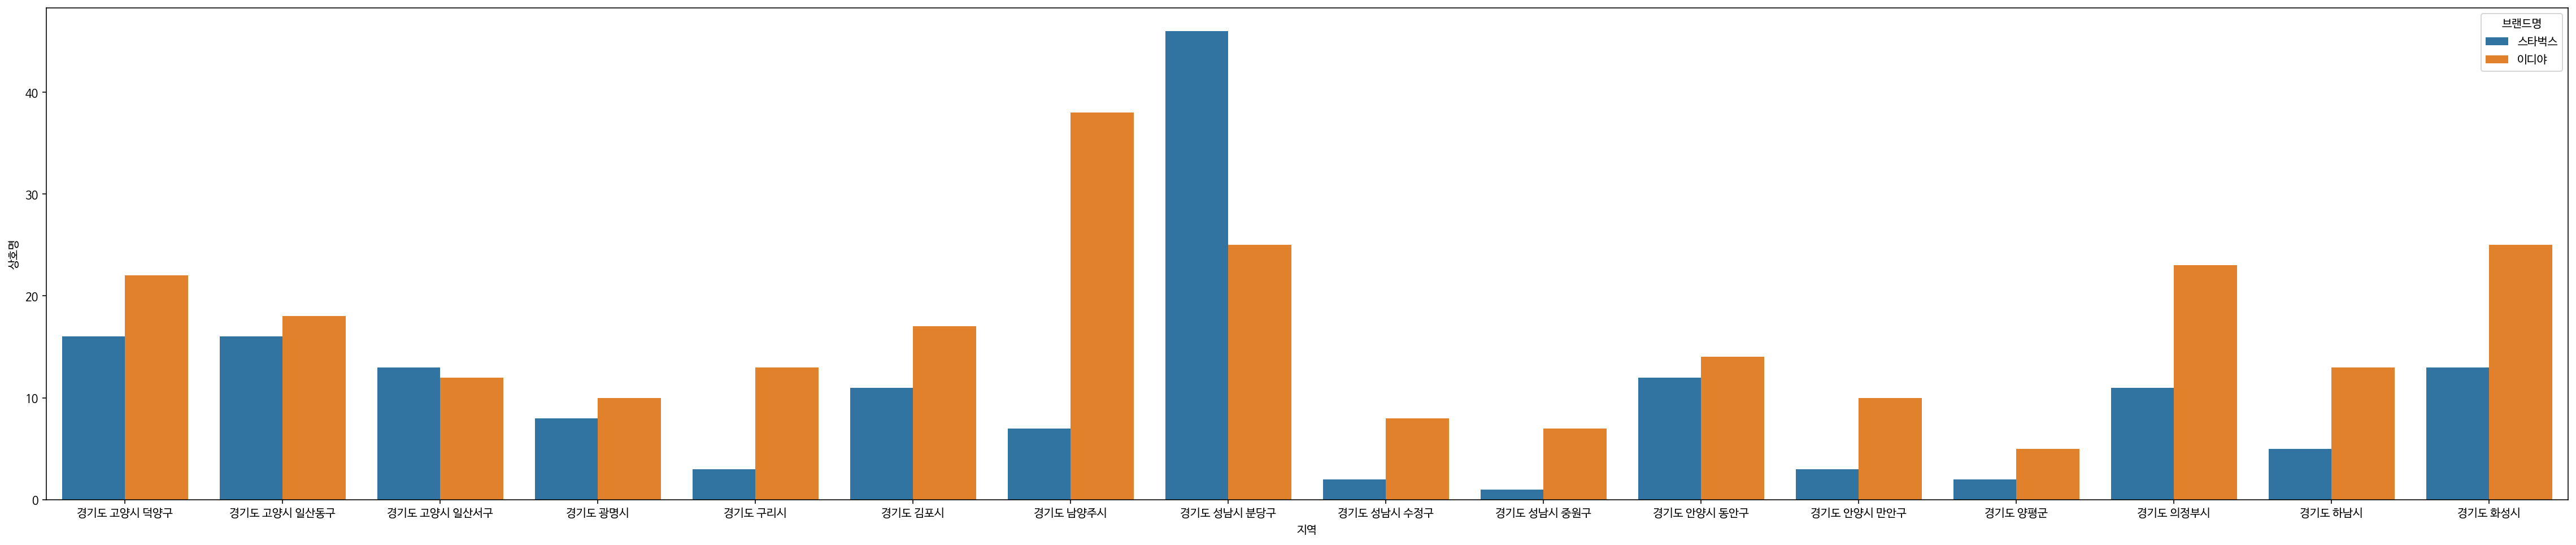

In [97]:
plt.figure(figsize=(40,8))
sns.barplot(data=gyeonggi_cafe, x='지역', y='상호명', ci=None, hue='브랜드명')